In [15]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()  # for plot styling
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
#importing the dataset
data = pd.read_csv('movie_metadata1.csv')
print (data.shape)
print (data.head)

(5043, 28)
<bound method NDFrame.head of                  color       director_name  num_critic_for_reviews  duration  \
0                Color       James Cameron                     723       178   
1                Color      Gore Verbinski                     302       169   
2                Color          Sam Mendes                     602       148   
3                Color   Christopher Nolan                     813       164   
4                   49         Doug Walker                      49        49   
5                Color      Andrew Stanton                     462       132   
6                Color           Sam Raimi                     392       156   
7                Color        Nathan Greno                     324       100   
8                Color         Joss Whedon                     635       141   
9                Color         David Yates                     375       153   
10               Color         Zack Snyder                     673       183   

In [16]:
data['director_facebook_likes']

0           0
1         563
2           0
3       22000
4         131
5         475
6           0
7          15
8           0
9         282
10          0
11          0
12        395
13        563
14        563
15          0
16         80
17          0
18        252
19        188
20          0
21        464
22          0
23          0
24        129
25          0
26          0
27         94
28        532
29        365
        ...  
5013        3
5014      892
5015        0
5016        0
5017      138
5018      589
5019      158
5020        8
5021      157
5022        0
5023       38
5024       91
5025        0
5026      107
5027      397
5028       18
5029       62
5030        5
5031      120
5032        3
5033      291
5034        0
5035        0
5036        2
5037        0
5038        2
5039       49
5040        0
5041        0
5042       16
Name: director_facebook_likes, Length: 5043, dtype: int64

In [17]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [18]:
newdata=data.iloc[:,4:6]
newdata

,director_facebook_likes,actor_3_facebook_likes
0,0,855
1,563,1000
2,0,161
3,22000,23000
4,131,49
5,475,530
6,0,4000
7,15,284
8,0,19000
9,282,10000


In [19]:
# Using the KMeans from sklearn
from sklearn.cluster import KMeans

In [20]:
kmeans = KMeans(n_clusters=5)

In [21]:
kmeans.fit(newdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
kmeans.cluster_centers_
#print(len(kmeans.cluster_centers_))

array([[  151.29382199,   420.67350785],
       [12490.38461538,   605.93269231],
       [17545.45454545, 14545.45454545],
       [  210.77011494, 11126.43678161],
       [17621.21212121,   596.10606061]])

In [23]:
print (kmeans.labels_)
print (len(kmeans.labels_))

[0 0 0 ... 0 0 0]
5043


In [24]:
print (type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 4775, 1: 104, 2: 11, 3: 87, 4: 66}


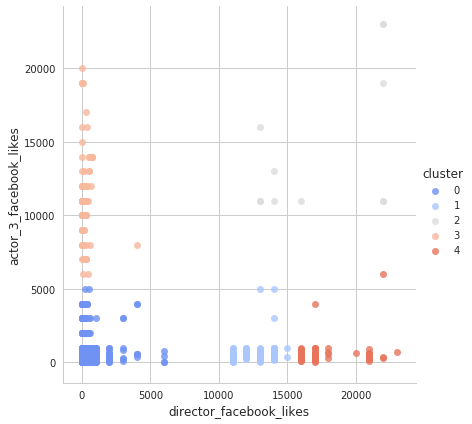

In [29]:
# plot the data 
newdata['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('director_facebook_likes', 'actor_3_facebook_likes',data=newdata, hue='cluster',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)